In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from sentence_transformers import SentenceTransformer, util


In [32]:
import pandas as pd
df = pd.read_csv('data/effective/augmented_predictions_all.csv')
df = df[['discourse_text', 'discourse_type', 'topics', 'predictions', 'context_predictions', 'augmented_predictions']]
df.sample(3)


,discourse_text,discourse_type,topics,predictions,context_predictions,augmented_predictions
24724,I'm with we should just stay voting for presid...,Position,0,We should keep the Electoral College for the v...,I have a couple reasons for saying that. First...,We should keep the Electoral College for the v...
27275,So having a second opinion is good to have.,Position,7,going to a second opinion is beneficial toward...,going to a second opinion is beneficial toward...,going to a second opinion is beneficial toward...
101,I disagree with the principal that every stude...,Claim,11,If a principal made every student engage in an...,I disagree that all students must participate ...,I disagree that all students must participate ...


In [33]:
type= {0 : "electoral_vote_college_president_votes", 
       1 : "emotions_technology_computer_facial_happy", 
       2 : "venus_planet_earth_author_surface", 
       3 : "face_mars_aliens_landform_natural", 
       4 : "online_students_classes_home_school", 
       5 : "community_service_help_kids_think", 
       6 : "summer_project_projects_students_teachers", 
       7 : "advice_multiple_opinions_people_ask", 
       8 : "cars_driverless_car_driver_driving", 
       9 : "cars_car_usage_smog_paris", 
       10 : "phones_cell_phone_school_policy", 
       11 : "extracurricular_activity_activities_students_school",
       12 : "luke_seagoing_animals_program_cowboys", 
       13 : "average_sports_play_grade_grades", 
       14 : "driving_phone_texting_cell_phones"}

df['topics'] = df['topics'].map(lambda x: type[x])
df['discourse_type'] = df['discourse_type'].str.lower()
df['len'] = df['discourse_text'].map(lambda x: len(x))
df = df[df['len'] < 1024]

In [23]:
test = df.copy()
test['len'] = test['discourse_text'].map(lambda x: len(x))
test[test['len'] < 1024]

,discourse_text,discourse_type,topics,predictions,context_predictions,augmented_predictions,len
81,The study the ability of humans to read subatl...,evidence,emotions_technology_computer_facial_happy,Every living thing on planet earth has emotion...,Cars in most countrioes are the leading pollut...,"In today's world, students are filled with man...",1449
86,The Mona lisa demonstration really intended to...,evidence,emotions_technology_computer_facial_happy,"According to the article ""Making Mona Lisa Smi...",With this in our cumputers it can read the emo...,"According to the article ""Making Mona Lisa Smi...",1165
174,Attention !!! to all the residents of this com...,evidence,cars_car_usage_smog_paris,Cars have always been apart of American cultur...,Cars in most countrioes are the leading pollut...,There's some of us who suffer from stress and ...,1974
288,Luke joined the program. He decided to because...,evidence,luke_seagoing_animals_program_cowboys,"Hi, I'm Luke Bomberger. I was a Seagoing Cowbo...",Cars in most countrioes are the leading pollut...,The Seagoing Cowboys program is a fun experien...,1039
291,Your frontalis pars lateralis muscle above you...,evidence,emotions_technology_computer_facial_happy,"like its says in paragraph 6 ""Imagine a comput...",While there are many positives to this technol...,The Facial Action Coding System enables comput...,1109
...,...,...,...,...,...,...,...
27101,"In conclusion, considering the idea for studen...",concluding statement,online_students_classes_home_school,Taking classes online and learning from home b...,but the parent may have to go to work or run e...,Online or video conferencing is seen by school...,1125
27107,Different people have different answers depend...,lead,advice_multiple_opinions_people_ask,As science is an ever-budding field by it's ow...,you see secretly i was showing examples of peo...,"As in the physical world, inertia carries idea...",1075
27110,You should always remember that perpendiculari...,evidence,advice_multiple_opinions_people_ask,it is on the brink of catastrophe.,you see secretly i was showing examples of peo...,Assuming that the exploration of Venus does ev...,1609
27114,Always remember that the perpendicularity of t...,concluding statement,advice_multiple_opinions_people_ask,it is on the brink of catastrophe.,you see secretly i was showing examples of peo...,"I'm a scientist at NASA and the Face, a lot of...",1142


In [34]:
df

,discourse_text,discourse_type,topics,predictions,context_predictions,augmented_predictions,len
0,"Hi, i'm Isaac, i'm going to be writing about h...",lead,face_mars_aliens_landform_natural,The curiousity about Mars has been going on fo...,"In 1976, Viking 1 took photos of Mars and foun...",The curiousity about Mars has been going on fo...,317
1,"On my perspective, I think that the face is a ...",position,face_mars_aliens_landform_natural,However NASA has provided evidence that proves...,When Mars Orbiter Camera team snap pictures it...,However NASA has provided evidence that proves...,210
2,I think that the face is a natural landform be...,claim,face_mars_aliens_landform_natural,However NASA has provided evidence that proves...,However NASA has provided evidence that proves...,However NASA has provided evidence that proves...,105
3,"If life was on Mars, we would know by now. The...",evidence,face_mars_aliens_landform_natural,"In the end, the landform was found to be a Mar...","In 1976, Viking 1 took photos of Mars and foun...","In the end, the landform was found to be a Mar...",362
4,People thought that the face was formed by ali...,counterclaim,face_mars_aliens_landform_natural,"Contrary to popular belief, there is nothing u...","In 1976, Viking 1 took photos of Mars and foun...","Contrary to popular belief, there is nothing u...",101
...,...,...,...,...,...,...,...
27434,For many people they don't like only asking on...,claim,advice_multiple_opinions_people_ask,Because one person might have better advice th...,"Advice is an opinion, opinions have bias in th...","Advice is an opinion, opinions have bias in th...",126
27435,also people have different views and opinions ...,claim,advice_multiple_opinions_people_ask,people have different views.,"Advice is an opinion, opinions have bias in th...",Everyone thinks differently and has their own ...,57
27436,Advice is something that can impact a persons ...,position,advice_multiple_opinions_people_ask,Good advice is something that will help you fi...,"Advice is an opinion, opinions have bias in th...","Advice is an opinion, opinions have bias in th...",121
27437,someone can use everything that many people sa...,evidence,advice_multiple_opinions_people_ask,The method of asking many people for their adv...,Now this reason would probably apply to someon...,"Advice is an opinion, opinions have bias in th...",439


<Axes: xlabel='len', ylabel='Density'>

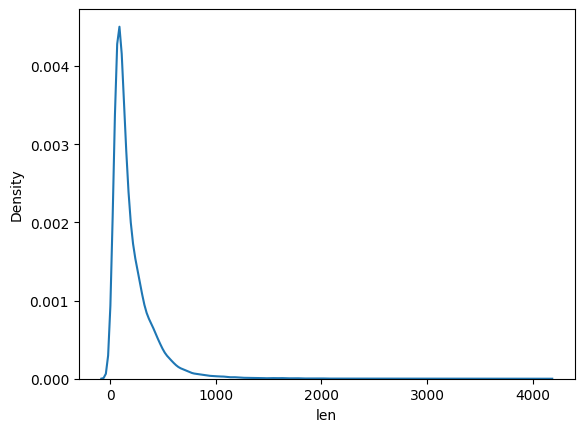

In [16]:
sns.kdeplot(test['len'])

In [ ]:
#sum(df['augmented_predictions'].str.contains('\u00a0'))
#sum(df['augmented_predictions'].str.contains('\xa0'))
sum(df['augmented_predictions'].str.contains('\n'))

In [35]:
df.to_csv('data/effective/augmented_predictions_all.csv')